<a href="https://colab.research.google.com/github/SejalLambat19/Machine-Learning/blob/main/mspa2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
# Simulated dataset
data = {
    'num_visits': [2, 5, 3, 6, 8, 2, 1, 7, 4, 6],
    'time_spent': [5.5, 12.0, 7.3, 15.2, 20.1, 4.2, 3.1, 17.0, 9.5, 14.3],
    'age_group': ['18-25', '26-35', '18-25', '36-45', '46-55', '18-25', '18-25', '26-35', '36-45', '46-55'],
    'product_viewed': ['Farm House', 'Flats', 'Housing', 'Farms', 'Flats', 'Housing', 'Farms', 'Farm House', 'Flats', 'Housing'],
    'purchase': ['Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes']
}

df = pd.DataFrame(data)
df.head()


,num_visits,time_spent,age_group,product_viewed,purchase
0,2,5.5,18-25,Farm House,Yes
1,5,12.0,26-35,Flats,Yes
2,3,7.3,18-25,Housing,No
3,6,15.2,36-45,Farms,Yes
4,8,20.1,46-55,Flats,Yes


In [3]:
# Encode categorical columns
le_age = LabelEncoder()
le_product = LabelEncoder()
le_purchase = LabelEncoder()

df['age_group'] = le_age.fit_transform(df['age_group'])
df['product_viewed'] = le_product.fit_transform(df['product_viewed'])
df['purchase'] = le_purchase.fit_transform(df['purchase'])

# Feature and Target
X = df[['num_visits', 'time_spent', 'age_group', 'product_viewed']]
y = df['purchase']


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

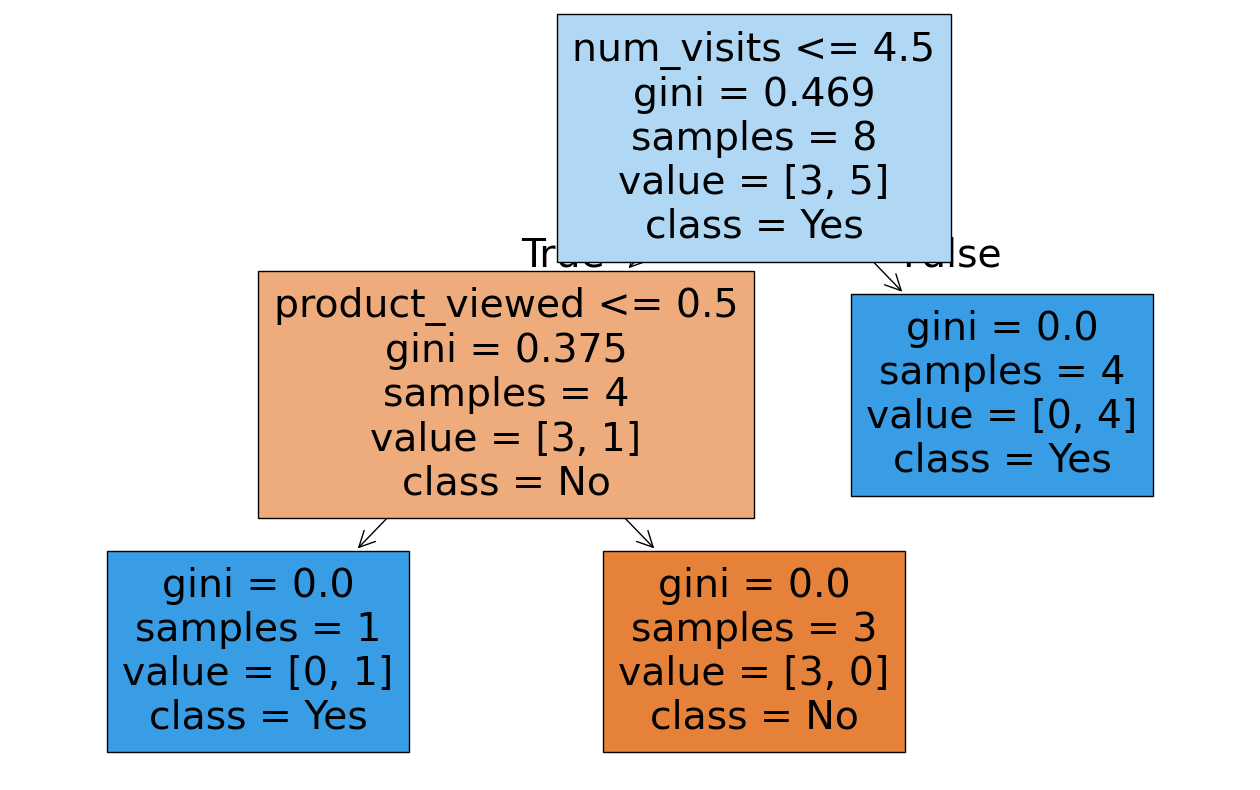

In [6]:
plt.figure(figsize=(16,10))
plot_tree(clf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.show()


In [7]:
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2


Confusion Matrix:
 [[1 0]
 [0 1]]


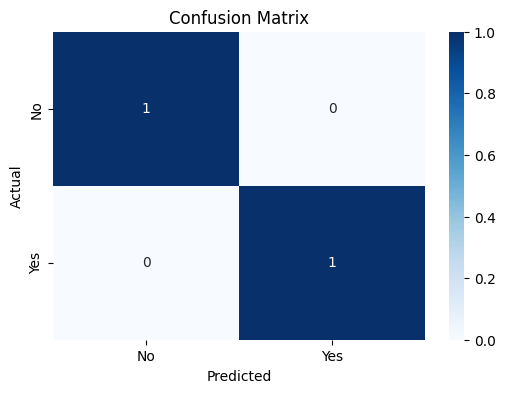

In [8]:
# Import necessary visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate predictions
y_pred = clf.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = ['No', 'Yes']

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
